# 442 Poisson Fit

In [1]:
#Import ueful librarie and functions to use in your analysis
import numpy as np
#from scipy.stats import poisson
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
# Random data points with Poisson distribution with mean 100 - put your data points here

file_kv = open("cs1s.txt", "r")
file_kv.readline()
file_kv.readline()
file_kv.readline()
data = []
sx=[]
for line in file_kv:
    string = line.split(" ")
    value = float(string[1])
    data.append(value)
    sx.append(np.sqrt(value))
ndata = len(data)

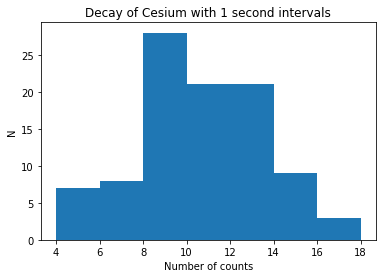

In [3]:
#Plot the histogram of your data with a given bin number (here 20)
plt.figure()
plt.hist(data,7)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Decay of Cesium with 1 second intervals")
plt.show()

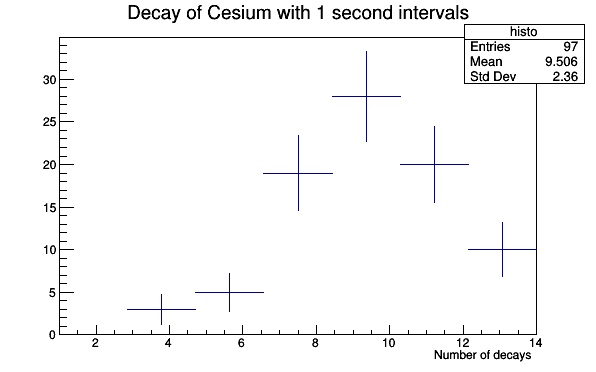

In [4]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Decay of Cesium with 1 second intervals", 7, 1, 14) 
#Label the X-Y axis
histo.GetYaxis().SetTitle("")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in data:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.SetFillColor(9)
histo.Draw("E")
c1.Draw()

 FCN=5.17357 FROM MINOS     STATUS=SUCCESSFUL     28 CALLS         111 TOTAL
                     EDM=2.1351e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.69027e+02   1.95342e+01   1.82308e-01  -1.79823e-06
   2  p1           1.02266e+01   3.93276e-01   3.93276e-01  -4.22330e-05


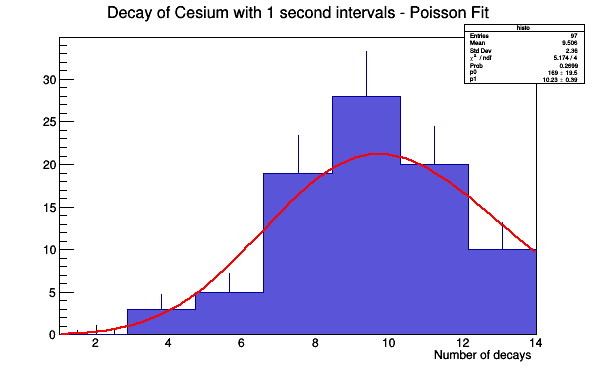

In [5]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",4,18) #(Change interval values (60,120) according to your data sets!!!)
histo.Draw("E")
#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(10, 10) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(42);
histo.Fit("fpois", "E")
histo.SetTitle("Decay of Cesium with 1 second intervals - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)
histo.Draw("same")
c1.Draw()

 FCN=1.71567 FROM MINOS     STATUS=SUCCESSFUL     84 CALLS         272 TOTAL
                     EDM=9.27351e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.67691e+01   4.03766e+00   1.88922e-02  -5.02346e-06
   2  Mean         9.64324e+00   2.99417e-01  -4.55865e-04   4.05368e-05
   3  Sigma        2.38111e+00   2.99130e-01   2.99130e-01  -1.78703e-03


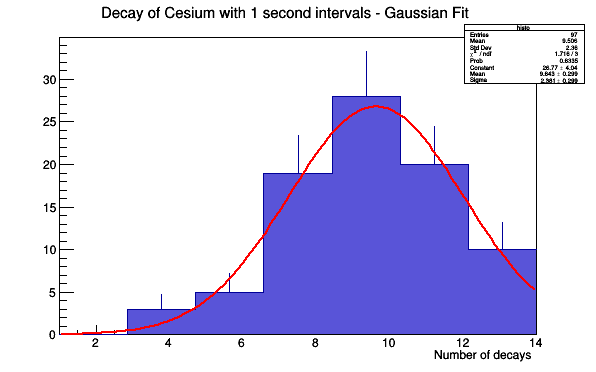

In [6]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 100, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")

histo.SetTitle("Decay of Cesium with 1 second intervals - Gaussian Fit")
histo.Draw("same")
c1.Draw("same")